In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns

In [21]:
df = pd.read_csv('heart1.xls')

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [32]:
from sklearn.preprocessing import StandardScaler

In [34]:
st=StandardScaler()
x_scaled=st.fit_transform(X)


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=2)

In [38]:
from sklearn.linear_model import LogisticRegression


In [40]:
clf1 = LogisticRegression()


In [42]:
clf1.fit(X_train,y_train)


LogisticRegression()

In [44]:
y_pred1 = clf1.predict(X_test)


In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))


Accuracy of Logistic Regression 0.8688524590163934


In [48]:
confusion_matrix(y_test,y_pred1)

array([[25,  7],
       [ 1, 28]], dtype=int64)

<Axes: >

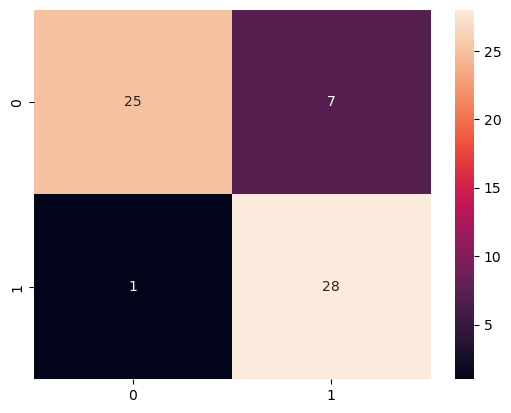

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)

In [51]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))

Logistic Regression Confusion Matrix



,0,1
0,25,7
1,1,28


In [54]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [56]:
print("For Logistic regression Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred1))
print("Recall - ",recall_score(y_test,y_pred1))
print("F1 score - ",f1_score(y_test,y_pred1))

For Logistic regression Model
--------------------------------------------------
    0   1
0  25   7
1   1  28
--------------------------------------------------
Precision -  0.8
Recall -  0.9655172413793104
F1 score -  0.875
